# Курс «Алгоритмы анализа данных»

## Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

### Домашняя работа к уроку 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [3]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [4]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
  return W

#### Задание 1

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

- 0 - константный признак
- 1 - стаж
- 2 - средняя стоимость занятия
- 3 - квалификация репетитора

In [5]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [6]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [7]:
X_st = X.copy().astype(np.float64)

Проведем стандартизацию

In [8]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

Сгенерим массив значений lambda_

In [9]:
l = [1]
[l.append(l[-1] / 1.2) for i in range(51)]
pass

In [10]:
W1 = []
W2 = []
W3 = []
W4 = []
for lmd in l:
    w1, w2, w3, w4 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmd)
    W1.append(w1)
    W2.append(w2)
    W3.append(w3)
    W4.append(w4)

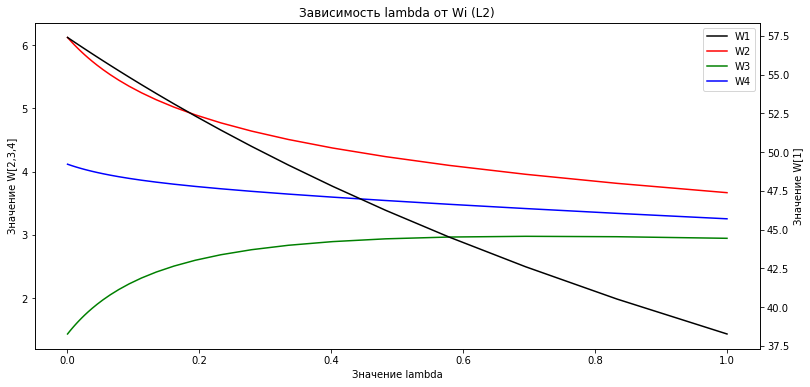

In [11]:
fig = plt.figure(figsize=(13, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

line2 = ax1.plot(l, W2, label = u'W2', color='red')
line3 = ax1.plot(l, W3, label = u'W3', color='green')
line4 = ax1.plot(l, W4, label = u'W4', color='blue')
ax1.set_xlabel(u'Значение lambda')
ax1.set_ylabel(u'Значение W[2,3,4]', color='black')
ax1.tick_params(axis='y', which='major', labelcolor='black')

line1 = ax2.plot(l, W1, label = u'W1', color='black')
ax2.set_ylabel(u'Значение W[1]', color='black')
ax2.tick_params(axis='y', which='major', labelcolor='black')

ax1.set_title(u'Зависимость lambda от Wi (L2)')

lns = line1 + line2 + line3 + line4
labs = [lbl.get_label() for lbl in lns]

plt.legend(lns, labs)

plt.show()

#### Задание 2

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

В работе

#### Задание 3

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

$$\frac{df}{dw_1} = \frac{d(\frac{\lambda}{2} \sum_{i=1}^m \mid W \mid)}{dw_1} = \frac{\lambda}{2} \sum_{i=1}^m \frac{d(\mid W \mid)}{dw_1} = \frac{\lambda}{2} \sum_{i=1}^m 1 = \frac{\lambda}{2} m$$

In [12]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    m = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * m / 2) 
    return W

In [13]:
W1 = []
W2 = []
W3 = []
W4 = []
for lmd in l:
    w1, w2, w3, w4 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmd)
    W1.append(w1)
    W2.append(w2)
    W3.append(w3)
    W4.append(w4)

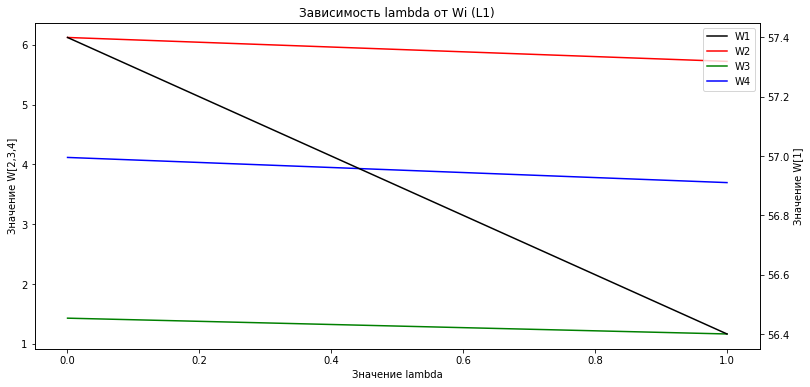

In [14]:
fig = plt.figure(figsize=(13, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

line2 = ax1.plot(l, W2, label = u'W2', color='red')
line3 = ax1.plot(l, W3, label = u'W3', color='green')
line4 = ax1.plot(l, W4, label = u'W4', color='blue')
ax1.set_xlabel(u'Значение lambda')
ax1.set_ylabel(u'Значение W[2,3,4]', color='black')
ax1.tick_params(axis='y', which='major', labelcolor='black')

line1 = ax2.plot(l, W1, label = u'W1', color='black')
ax2.set_ylabel(u'Значение W[1]', color='black')
ax2.tick_params(axis='y', which='major', labelcolor='black')

ax1.set_title(u'Зависимость lambda от Wi (L1)')

lns = line1 + line2 + line3 + line4
labs = [lbl.get_label() for lbl in lns]

plt.legend(lns, labs)

plt.show()